<a href="https://colab.research.google.com/github/patanAziz/ML-Dl-NLP/blob/main/SongsRecomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle -q

In [ ]:
import os
import json
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [ ]:
kaggle_confiq = json.load(open('/content/kaggle (1).json'))

In [ ]:
kaggle_confiq.keys()

dict_keys(['username', 'key'])

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'abdulazizkhan7'
os.environ['KAGGLE_KEY'] = kaggle_confiq['key']

In [ ]:
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
  0% 0.00/20.7M [00:00<?, ?B/s]
100% 20.7M/20.7M [00:00<00:00, 1.02GB/s]


In [ ]:
!ls

'kaggle (1).json'   sample_data   spotify-million-song-dataset.zip


In [ ]:
with zipfile.ZipFile("spotify-million-song-dataset.zip","r") as zip_ref:
  zip_ref.extractall()

In [ ]:
!ls

'kaggle (1).json'   spotify-million-song-dataset.zip
 sample_data	    spotify_millsongdata.csv


In [ ]:
df = pd.read_csv('/content/spotify_millsongdata.csv')

In [ ]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [ ]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [ ]:
df.drop('link',axis=1, inplace=True)


In [ ]:
# top artists
top_artists = df['artist'].value_counts().head(10)
print("Top 10 Artists are:")
top_artists


Top 10 Artists are:


,count
artist,
Donna Summer,191
Gordon Lightfoot,189
Bob Dylan,188
George Strait,188
Loretta Lynn,187
Alabama,187
Cher,187
Reba Mcentire,187
Chaka Khan,186


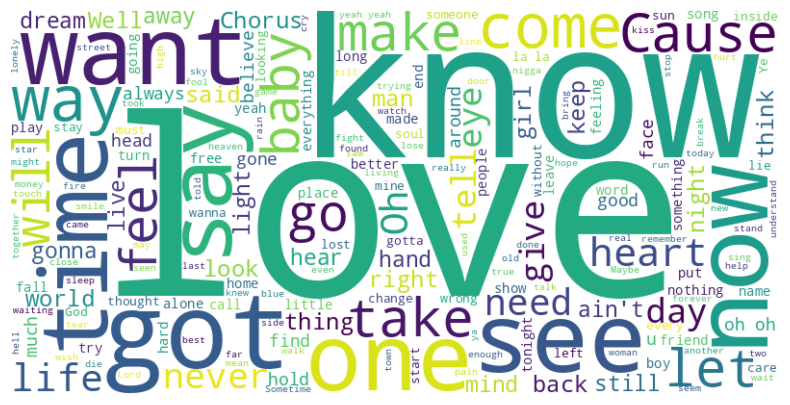

In [ ]:
df = df.sample(5000).reset_index(drop=True)
all_lyrics = " ".join(df['text'].dropna())
word_cloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)
plt.figure(figsize=(10,5))
plt.imshow(word_cloud , interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def process(text):
  # Lower
  text = text.lower()
  # removing non-alphabatic charecters
  text = re.sub(r'[^a-zA-Z\s]', '' ,text)
  # tokenize it
  tokens = word_tokenize(text)
  # stop words
  tokens = [word for word in tokens if word not in stop_words]
  return " ".join(tokens)

In [ ]:
df['cleaned_text'] = df['text'].apply(process)

In [ ]:
df.head()

,artist,song,text,cleaned_text
0,Fabolous,Baby Featmike Shorey,(feat. Mike Shorey) \r\n \r\n[Intro] \r\nFa...,feat mike shorey intro fab x baby ms ill never...
1,Electric Light Orchestra,Come With Me,Come with me \r\n \r\nIts all so easy for me...,come easy see close together always forever yo...
2,Olivia Newton-John,Silvery Rain,Butterflies danced on invisible strings \r\nS...,butterflies danced invisible strings showing w...
3,Alphaville,20. Th Century,in the beginning \r\nthere was no light \r\n...,beginning light teenage heaven hell songs voic...
4,Nazareth,Morning Dew,Walk me out in the morning dew \r\nWalk me ou...,walk morning dew walk morning dew today cant w...


In [ ]:
tdid_vectorizer = TfidfVectorizer(max_df=5000)
tfid_matrix = tdid_vectorizer.fit_transform(df['cleaned_text'])

In [ ]:
# cosine-similarity
cosine = cosine_similarity(tfid_matrix)

In [ ]:
def recomended_song(song_name):
  song_index = df[df['song'].str.lower() == song_name.lower()].index

  if len(song_index) == 0:
    print("It doesn't exists")
    return
  song_index =song_index[0]


  sim_score = list(enumerate(cosine[song_index]))
  sim_score = sorted(sim_score , key=lambda x : x[1] , reverse=True)
  sim_score = sim_score[1:5]

  act_sng_indx = [i[0] for i in sim_score]

  return df[['artist','song']].iloc[act_sng_indx]


In [ ]:
df['song'][2]

'Silvery Rain'

In [ ]:
print("Songs recomendation system")
recomendations = recomended_song('Star People')
recomendations

Songs recomendation system
It doesn't exists


In [ ]:
import pickle
pickle.dump(df,open('sng_rec.pkl','wb'))
pickle.dump(cosine,open('cosine.pkl','wb'))